# Exercise 1 - Logic

Use LaTeX commands to write logic symbols in jupyter notebook: [LaTeX logic symbols](https://en.wikipedia.org/wiki/List_of_logic_symbols)

## Task 1 - Warmup - Truth table

#### a) Build the truth table for the following sentences. Assume that we have two arbitrary atomic sentences $\alpha$, $\beta$ and $\gamma$. Fill out the missing combinations of the three sentences. How many combinations do we have for $n$ sentences?

| $\alpha$ | $\beta$ | $\gamma$ | $$\alpha \land (\beta \lor \gamma)$$ | $$(\alpha \lor (\beta \lor \gamma))$$ | $$(\alpha \lor \beta)\land(\alpha \lor \gamma)$$ |
|:--------:|:-------:|:--------:|:----------------------------------:|:-----------------------------------:|:----------------------------------------------:|
|   false  |  false  |   false  |false|false|false|
|   false  |  false  |   true   |false|true |false|
|   false  |   true  |   false  |false|true |false|
|   false  |   true  |   true   |false|true |true |
|   true   |  false  |   false  |false|true |true |
|   true   |  false  |   true   |true |true |true |
|   true   |  true   |   false  |true |true |true |
|   true   |  true   |   true   |true |true |true |

for $n$ sentences, we have $2^{n}$ combinations

b) Find equivalences of the following complex sentences:
1) $(\alpha \land (\beta \lor \gamma)) \equiv (\alpha \land \beta) \lor (\alpha \land \gamma)$

2) $(\alpha \lor (\beta \lor \gamma)) \equiv ((\alpha \lor \beta) \lor \gamma) \equiv ((\alpha \lor \gamma) \lor \beta) \equiv (\alpha \lor \beta \lor \gamma)$

3) $(\alpha \lor \beta)\land(\alpha \lor \gamma) \equiv (\alpha \lor (\beta \land\gamma))$

## Task 2 - Propositional Theorem Proving

We know already that a two arbitrary sentences $\alpha$ and $\beta$ are equivalent if and only if each of them entails the other:

$\alpha \equiv \beta$ if and only if $\alpha \models \beta$ and $\beta \models \alpha$

#### a) Give an example of a tautology.

$\rightarrow$ A Tautology is any sentence or atomic sentence that is always true.

**Example:** The sun may or may not rise from the east for all planets in the solar system. This statement is a tautology because it is true for all planets, regardless of the fact that all planets except Venus and Uranus rotate counter-clock wise.

**Another Example:** The sentence ($A \lor \lnot A$) is always true.

#### b) What is the definition of the SAT problem?

A SAT problem, also known as the satisfiability problem (in context of logical mathematics) is a problem where we determine if there is a combination of True or False values which when put in place of variables of a formula, can result to the sentence evaluation as True.

For example, in the expression $A \lor B$, we can substitute the values of A and B as True and False to get the result as True. This lets us conclude that this formula is satisfiable.

#### c) Which of the following are correct?

1) $(A\land B) \models A{\Leftrightarrow}B$

2) $A\Leftrightarrow B \models A \lor B$

3) $A\Leftrightarrow B \models \lnot A \lor B$ 

We can construct a truth table for the sentences present on both sizes in the above expressions as follows

| $A$ | $B$ | $A{\Leftrightarrow}B$ | $A \lor B$ | $A\land B$ | $\lnot A \lor B$ |
|:--------:|:-------:|:-------:|:-----:|:-----:|:-----:|
|   True   |  True   |   True  | True  | True  | True  |
|   True   |  False  |   False | True  | False | False |
|   False  |  True   |   False | True  | False | True  |
|   False  |  False  |   True  | False | False | True  |

$\mathbf{Answer\;1)} \;\; (A\land B)$ entails $(A\Leftrightarrow B)$, or $(A\land B) \models (A\Leftrightarrow B)$, since for all true valuations of $(A\land B)$, the valuations of $(A\Leftrightarrow B)$ are also true. so this statement is $\mathbf{CORRECT}$.

$\mathbf{Answer\;2)} \;\; (A\Leftrightarrow B)$ does not entail $(A\lor B)$, or $(A\Leftrightarrow B) \nvDash (A\lor B)$, since for all true valuations of $(A\Leftrightarrow B)$, the valuations of $(A\lor B)$ are not necessarily true. so this statement is $\mathbf{INCORRECT}$.

$\mathbf{Answer\;3)} \;\; (A\Leftrightarrow B)$ entails $(\lnot A \lor B)$, or $(A\Leftrightarrow B) \models (\lnot A \lor B)$, since for all true valuations of $(A\Leftrightarrow B)$, the valuations of $(\lnot A \lor B)$ are also true. so this statement is $\mathbf{CORRECT}$.

## Task 3 - Coding

#### Write a recursive algorithm IsPLTrue$(sentence, m)$ that returns ${true}$ if and only if the sentence $s$ is true in the model $m$ (where $m$ assigns a truth value for every symbol in $s$).

Use pseudo code only as we dont have enough definitions to write python code!

$$
\text{IsPLTrue}(sentence, m) \text{ that returns } \text{true}
$$


We can use the divide and conquer approach recursively to solve this problem.

During the expansion phase, we split the sentence into 2 parts and do the same for each part till we are left with only primitive symbols whose values can be substituted directly from the model.

Then in the combination phase, we start to evaluate these symbols with their operators to get the final answer

we also make sure that terms in brackets are considered seperate terms

In [ ]:
# =========== PseudoCode =========== #

"""

function isPLTrue(s: sentence, m: model) -> bool:
    if(sentence == symbol):
        return model.evaluate(symbol)
    else:
    
        left_sentence, right_sentence, operator = sentence.split_by_operator()

        /*
            sentence.split_by_operator() returns [left_Sentence, right_sentence, op]
            here,
            op is the operator that can be used to break the sentence into two halves for indivisual evaluation
            left_sentence and right_sentence are the broken down sentences 
        */

        // returns     NOT(sentence)
        if(operator == NOT):
            return NOT(
                isPLTrue( sentence )
            )

        
        // returns     left AND right
        elif(operator == AND):
            return AND(
                isPLTrue( left_sentence ),

                isPLTrue( right_sentence )
            )

        
        // returns     left OR right
        elif(operator == OR):
            return OR(
                isPLTrue( left_sentence ),

                isPLTrue( right_sentence )
            )

        
        // returns     NOT(left) OR right
        elif(operator == IMPLIES):
            returns OR(
                NOT(
                    isPLTrue( left_sentence )
                ),

                isPLTrue( right_sentence )

            )

        
        // returns     (left AND right) OR  ( NOT(left) AND NOT(right) )
        elif(operator == IFF):
            returns OR{
                AND{
                    isPLTrue( left_sentence ), isPLTrue( right_sentence )
                },

                AND{
                    NOT{
                        isPLTrue( left_sentence )
                    }, 
                    
                    NOT{
                        isPLTrue( right_sentence )
                    }
                },
            }


"""

here is the readable image with no linting
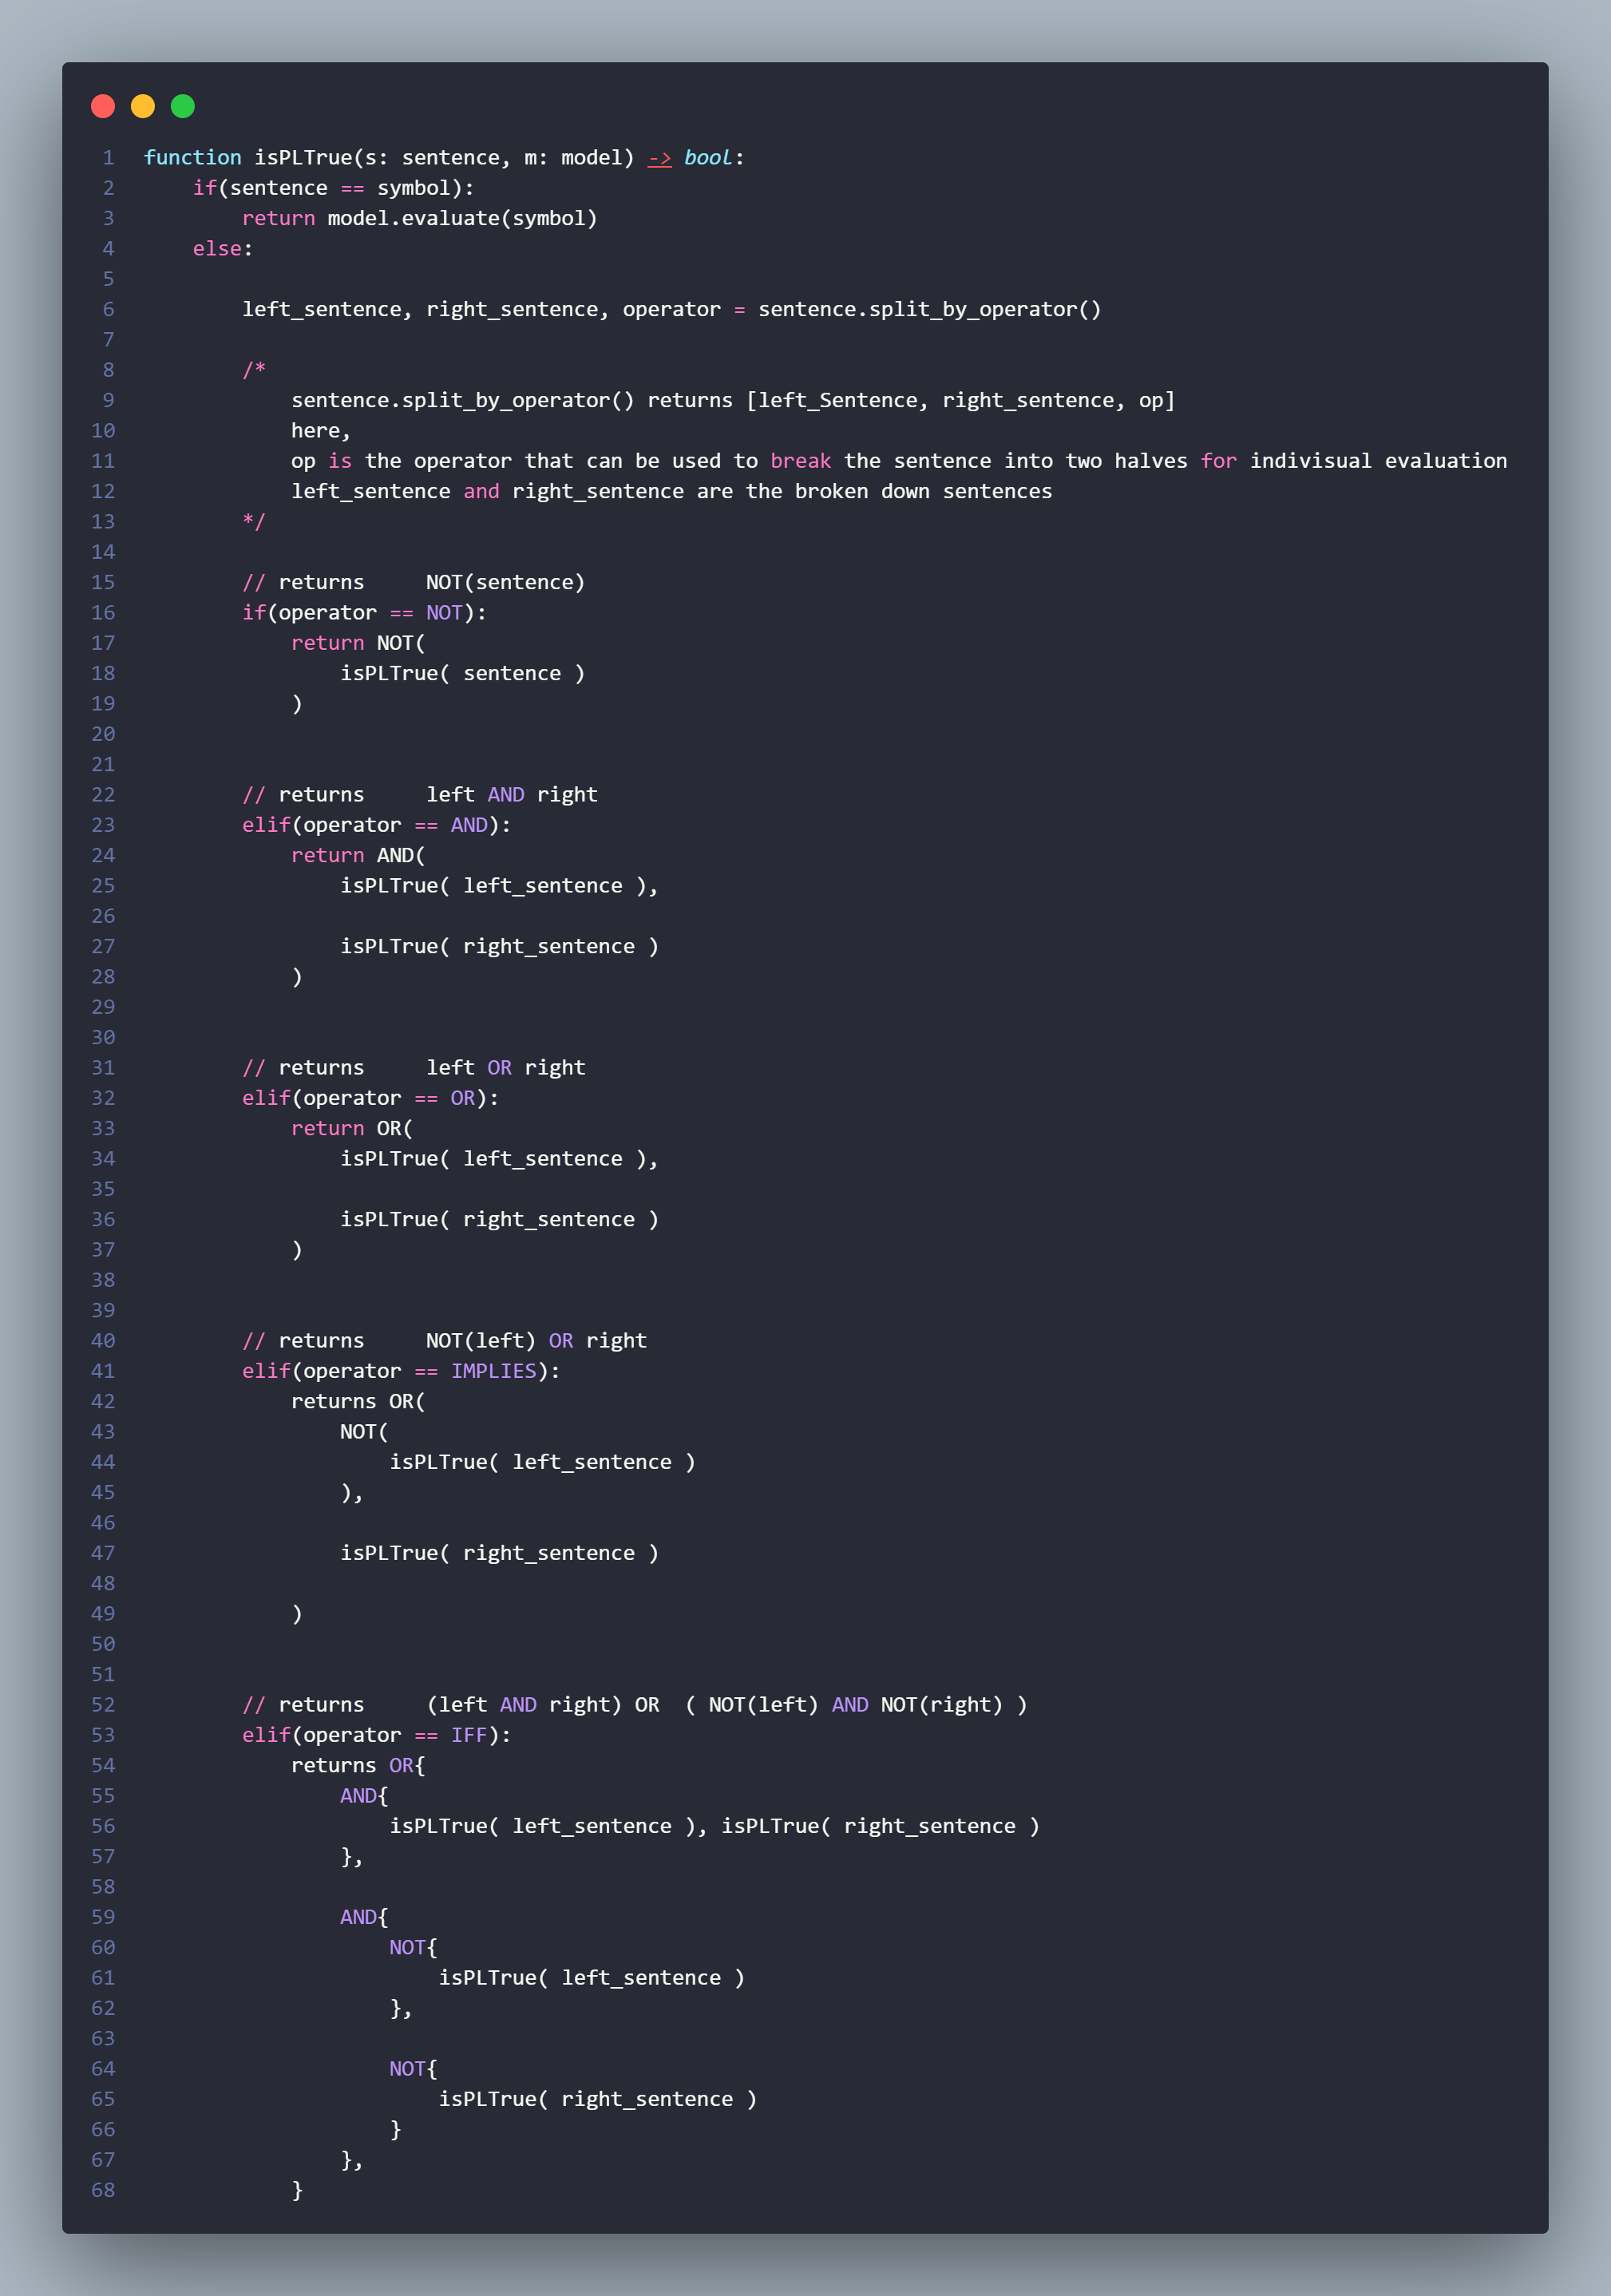